In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [31]:
df = pd.read_csv("dataset.csv")

df.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [ ]:
df.isnull().sum()

In [ ]:
df.shape

In [15]:
df.columns

Index(['valor_aluguel', 'area_m2', 'ano_construcao', 'codigo_localidade',
       'numero_banheiros', 'numero_cozinhas', 'codigo_bairro'],
      dtype='object')

In [ ]:
# Infos do DataFrame
df.info()

In [ ]:
# Resumo estatístico
df.describe()

<Axes: xlabel='valor_aluguel', ylabel='Count'>

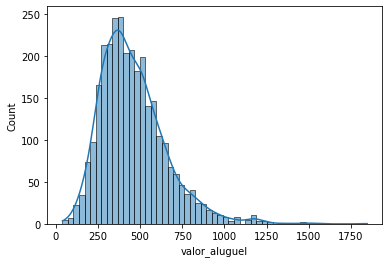

In [37]:
# Histograma (Distribuição de Frequências)
sns.histplot(data=df, x="valor_aluguel", kde=True)

In [26]:
# Correlação
df.corr()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
valor_aluguel,1.000000,0.584878,0.139194,0.172368,0.250261,0.170707,-0.020846
area_m2,0.584878,1.000000,-0.226581,0.110046,0.226306,0.045716,-0.089050
ano_construcao,0.139194,-0.226581,1.000000,-0.152206,0.065824,0.109881,0.327983
codigo_localidade,0.172368,0.110046,-0.152206,1.000000,0.037858,-0.004774,-0.282528
numero_banheiros,0.250261,0.226306,0.065824,0.037858,1.000000,0.064216,0.043600
numero_cozinhas,0.170707,0.045716,0.109881,-0.004774,0.064216,1.000000,0.029495
codigo_bairro,-0.020846,-0.089050,0.327983,-0.282528,0.043600,0.029495,1.000000


<Axes: xlabel='area_m2', ylabel='valor_aluguel'>

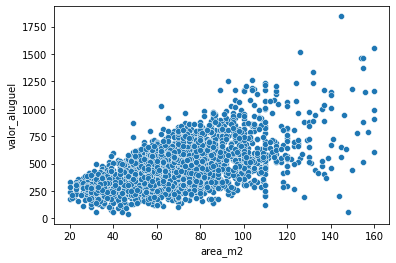

In [36]:
# Gráfico de Dispersão
sns.scatterplot(data=df, x="area_m2", y="valor_aluguel", h)

In [45]:
# OLS (Ordinary Least Squares / Mínimo Quadrados Ordinários) - Regressão linear 

y = df["valor_aluguel"]
X = df["area_m2"]
X = sm.add_constant(X)

# Criando o modelo
modelo = sm.OLS(y, X)

# Treinando-o
resultado = modelo.fit()

resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          valor_aluguel   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1559.
Date:                Sun, 25 Jun 2023   Prob (F-statistic):          6.84e-275
Time:                        09:46:54   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6988      8.750     15.279      0.000     116.541     150.856
area_m2        4.8386      0.123     39.482      0.000       4.598       5.079
==============================================================================
Omnibus:                      206.173   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              441.379
Skew:                           0.448   Prob(JB):                     1.43e-96
Kurtosis:                       4.651   Cond. No.                         215.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Coeficiente de Determinação ( R² )
# R² == 1           ==> Variável dependente (resultado ou alvo) é explicada totalmente pela var independente ( explicativa ou preditora)
# R² entre 0 e 1    ==> Variável dep. explicada parcialmente. Qto maior, mais relevante é a indepente e mais forte é a relação

Claramente existe uma forte relação entre a área (em m2) dos imóveis e o valor do aluguel. Entretanto, apenas a área dos imóveis não é suficiente para explicar a variação no valor do aluguel, pois nosso modelo obteve um coeficiente de determinação (R²) de apenas 0.34.

O ideal seria usar mais variáveis de entrada para construir o modelo a fim de compreender se outros fatores influenciam no valor do aluguel.

É sempre importante deixar claro que correlação não implica causalidade e que não podemos afirmar que o valor do aluguel muda apenas devido à área dos imóveis. Para estudar causalidade devemos aplicar Análise Causal.



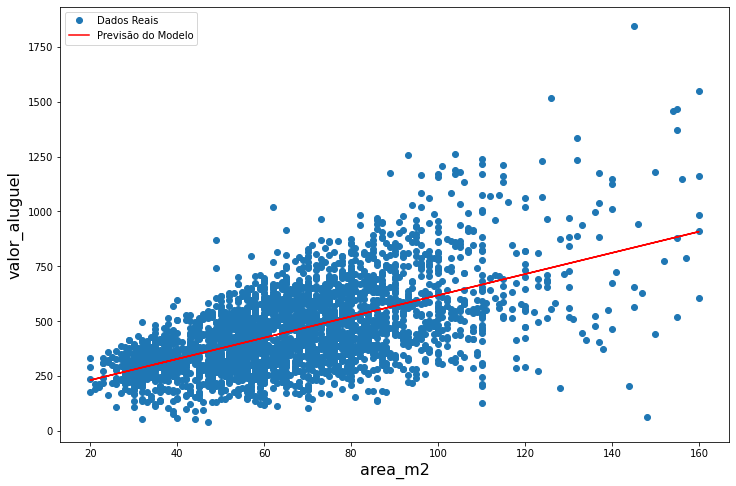

In [50]:
# Plot
plt.figure(figsize=(12, 8))
plt.xlabel("area_m2", size=16)
plt.ylabel("valor_aluguel", size=16)
plt.plot(X["area_m2"], y, "o", label = "Dados Reais" )
plt.plot(X["area_m2"], resultado.fittedvalues, "-r", label = "Previsão do Modelo")
plt.legend(loc = "best")
plt.show()